<a href="https://colab.research.google.com/github/Aditya-y9/StockMarketML/blob/main/StockMarketML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Predictor (Advanced)

In [1032]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [1033]:
stock = yf.Ticker("LTIM.BO")

Stock prices are time-series data (with time the data variable is changing)

In [1034]:
history = stock.history(period="max")

In [1035]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-07-21 00:00:00+05:30,634.554673,675.868339,633.983540,664.112061,2242495,0.0,0.0
2016-07-22 00:00:00+05:30,666.349081,674.916427,662.588957,666.015930,235894,0.0,0.0
2016-07-25 00:00:00+05:30,666.349099,667.824575,658.733681,659.685608,92266,0.0,0.0
2016-07-26 00:00:00+05:30,659.685530,667.729326,658.733603,659.399963,109440,0.0,0.0
2016-07-27 00:00:00+05:30,660.447119,664.254828,653.022098,656.401428,79300,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-15 00:00:00+05:30,6330.600098,6442.649902,6249.899902,6314.049805,15768,0.0,0.0
2024-01-16 00:00:00+05:30,6305.000000,6305.000000,6197.149902,6234.700195,7647,0.0,0.0
2024-01-17 00:00:00+05:30,6200.000000,6326.350098,6156.549805,6277.649902,9600,0.0,0.0


In [1036]:
history.index

DatetimeIndex(['2016-07-21 00:00:00+05:30', '2016-07-22 00:00:00+05:30',
               '2016-07-25 00:00:00+05:30', '2016-07-26 00:00:00+05:30',
               '2016-07-27 00:00:00+05:30', '2016-07-28 00:00:00+05:30',
               '2016-07-29 00:00:00+05:30', '2016-08-01 00:00:00+05:30',
               '2016-08-02 00:00:00+05:30', '2016-08-03 00:00:00+05:30',
               ...
               '2024-01-08 00:00:00+05:30', '2024-01-09 00:00:00+05:30',
               '2024-01-10 00:00:00+05:30', '2024-01-11 00:00:00+05:30',
               '2024-01-12 00:00:00+05:30', '2024-01-15 00:00:00+05:30',
               '2024-01-16 00:00:00+05:30', '2024-01-17 00:00:00+05:30',
               '2024-01-19 00:00:00+05:30', '2024-01-20 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=1833, freq=None)

# CLEANING AND VISUALIZING

<Axes: xlabel='Date'>

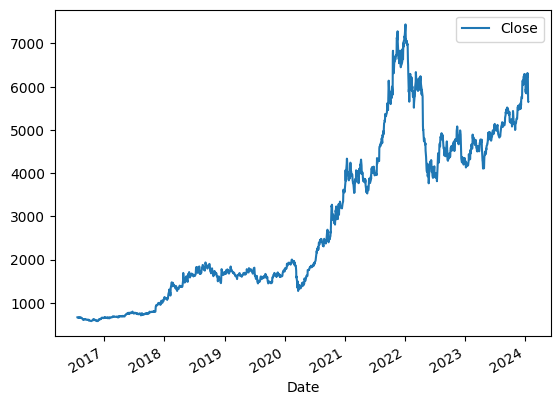

In [1037]:
history.plot.line(y="Close",use_index=True)

In [1038]:
# Why didnt I buy this! (crying)

In [1039]:
# delete unnecessary columns
del history["Dividends"]
del history["Stock Splits"]

# Setting up our TARGET for ML

In [1040]:
# creating a column for Tomorrow's Price
history["Tomorrow"]  = history["Close"].shift(-1)

# shifted all prices back one day

In [1041]:
history

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2016-07-21 00:00:00+05:30,634.554673,675.868339,633.983540,664.112061,2242495,666.015930
2016-07-22 00:00:00+05:30,666.349081,674.916427,662.588957,666.015930,235894,659.685608
2016-07-25 00:00:00+05:30,666.349099,667.824575,658.733681,659.685608,92266,659.399963
2016-07-26 00:00:00+05:30,659.685530,667.729326,658.733603,659.399963,109440,656.401428
2016-07-27 00:00:00+05:30,660.447119,664.254828,653.022098,656.401428,79300,647.262939
...,...,...,...,...,...,...
2024-01-15 00:00:00+05:30,6330.600098,6442.649902,6249.899902,6314.049805,15768,6234.700195
2024-01-16 00:00:00+05:30,6305.000000,6305.000000,6197.149902,6234.700195,7647,6277.649902
2024-01-17 00:00:00+05:30,6200.000000,6326.350098,6156.549805,6277.649902,9600,5651.000000


In [1042]:
# boolean indicating if tomorrow's price is greater than today's price

# then converting it to binary data for our model
history["Target"] = (history["Tomorrow"] > history["Close"]).astype(int)

In [1043]:
history

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2016-07-21 00:00:00+05:30,634.554673,675.868339,633.983540,664.112061,2242495,666.015930,1
2016-07-22 00:00:00+05:30,666.349081,674.916427,662.588957,666.015930,235894,659.685608,0
2016-07-25 00:00:00+05:30,666.349099,667.824575,658.733681,659.685608,92266,659.399963,0
2016-07-26 00:00:00+05:30,659.685530,667.729326,658.733603,659.399963,109440,656.401428,0
2016-07-27 00:00:00+05:30,660.447119,664.254828,653.022098,656.401428,79300,647.262939,0
...,...,...,...,...,...,...,...
2024-01-15 00:00:00+05:30,6330.600098,6442.649902,6249.899902,6314.049805,15768,6234.700195,0
2024-01-16 00:00:00+05:30,6305.000000,6305.000000,6197.149902,6234.700195,7647,6277.649902,1
2024-01-17 00:00:00+05:30,6200.000000,6326.350098,6156.549805,6277.649902,9600,5651.000000,0


In [1044]:
# only take data which is relatively naya
history = history.loc["2015-01-01":].copy()

In [1045]:
history

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2016-07-21 00:00:00+05:30,634.554673,675.868339,633.983540,664.112061,2242495,666.015930,1
2016-07-22 00:00:00+05:30,666.349081,674.916427,662.588957,666.015930,235894,659.685608,0
2016-07-25 00:00:00+05:30,666.349099,667.824575,658.733681,659.685608,92266,659.399963,0
2016-07-26 00:00:00+05:30,659.685530,667.729326,658.733603,659.399963,109440,656.401428,0
2016-07-27 00:00:00+05:30,660.447119,664.254828,653.022098,656.401428,79300,647.262939,0
...,...,...,...,...,...,...,...
2024-01-15 00:00:00+05:30,6330.600098,6442.649902,6249.899902,6314.049805,15768,6234.700195,0
2024-01-16 00:00:00+05:30,6305.000000,6305.000000,6197.149902,6234.700195,7647,6277.649902,1
2024-01-17 00:00:00+05:30,6200.000000,6326.350098,6156.549805,6277.649902,9600,5651.000000,0


# Training an initial Machine Learning Model

In [1046]:
from sklearn.ensemble import RandomForestClassifier


# work by training randomparameters and average out.
# resistant to overfitting
# can pick up non-linear tendencies in the data

# for example open price is not linearly related with the target
                              # higher --> better  , optimum  ,
model = RandomForestClassifier(n_estimators=10000,min_samples_split = 100,random_state = 1)


# splitting data

# all rows till 100 in the trauning set
train = history.iloc[:-100]



# last hundred rows in the test set
test = history.iloc[-100:]




predictors = ["Close","Volume","Open","High","Low"]

model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=10000,
                       random_state=1)

In [1047]:
from sklearn.metrics import precision_score


# exam time!


preds = model.predict(test[predictors])

In [1048]:
import pandas as pd
preds = pd.Series(preds,index=test.index)

In [1049]:
precision_score(test["Target"],preds)

0.5454545454545454

# Making the Model Better

In [1050]:
combined  = pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

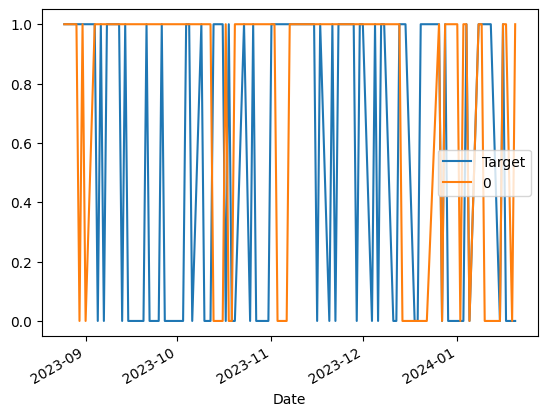

In [1051]:
combined.plot()

# Building a BackTesting System

In [1052]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [1053]:
def backtest(data, model, predictors, start=1000, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)


In [ ]:
predictions = backtest(history, model, predictors)

In [ ]:
if 'Predictions' in predictions.columns:
    print(predictions["Predictions"].value_counts())
else:
    print("The 'Predictions' column does not exist in the DataFrame.")


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

# Adding Additional Predictors to our Model

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_average = history.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    history[ratio_column] = history["Close"] / rolling_average["Close"]


    trend_column = f"Trend_{horizon}"
    history[trend_column] = history.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [ ]:
history

# Improving our Model

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions["Predictions"].value_counts()